# Implementação do Zero

In [25]:
import numpy as np

In [26]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        X_train = np.concatenate([X_train, np.ones([n_samples,1])], axis=1)
        self.weights =  np.zeros(n_features+1)

        for n in range(self.n_iter):
            y_pred = np.dot(X_train, self.weights)

            gradient = (-2/n_samples) * ((y_train - y_pred).T @ X_train)

            self.weights -= ((self.lr/2) * gradient)

        return self.weights


    def predict(self, X_test):
        n_samples, n_features = X_test.shape
        X_test = np.concatenate([X_test, np.ones([n_samples,1])], axis=1)
        y_pred = np.dot(X_test, self.weights)
        return y_pred



# Teste

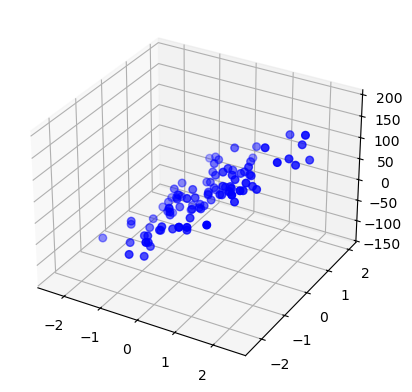

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=2, noise=20, random_state=4)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='b', marker='o', s=30)
plt.show()

In [29]:
regressor = LinearRegression(0.01, 1500)
weights = regressor.fit(X_train, y_train)
print(weights)
predictions = regressor.predict(X_test)

[59.06894196  5.34572311  3.59956789]


In [30]:
def MSE(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse =  MSE(y_test, predictions)
print(mse)

523.5927186262554


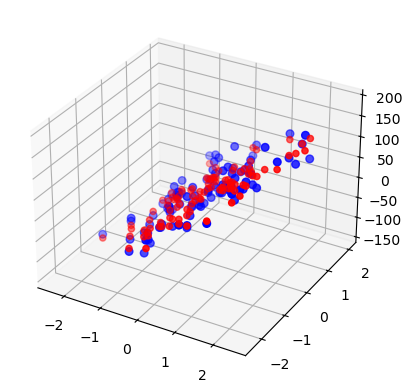

In [31]:
y_pred_line =  regressor.predict(X)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='b', marker='o', s=30)
ax.scatter(X[:,0], X[:,1], y_pred_line, color='r')
plt.show()


# Modelo Nativo do SKLearn

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor2 = LinearRegression()

In [34]:
regressor2.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions2 = regressor2.predict(X_test)
mse2 =  MSE(y_test, predictions2)
print(mse2)

523.5926958998864
